In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPool2D

In [4]:
img = image.load_img("C:/Users/svneh/OneDrive/Desktop/computerVisio/baseData/training/cat/cat3.jpg")

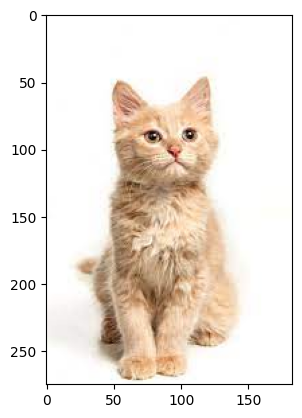

In [5]:
plt.imshow(img)

In [6]:
cv2.imread("C:/Users/svneh/OneDrive/Desktop/computerVisio/baseData/training/cat/cat3.jpg").shape

(275, 183, 3)

In [7]:
## 275 pixels height
## 183 pixels width
## rgb colors so 3 channels red,green,blue

In [8]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [9]:
train_dataset = train.flow_from_directory('C:/Users/svneh/OneDrive/Desktop/computerVisio/baseData/training/',
                                          target_size=(150,150),
                                          batch_size=3,
                                          class_mode = 'binary')
validation_dataset = train.flow_from_directory('C:/Users/svneh/OneDrive/Desktop/computerVisio/baseData/validation/',
                                          target_size=(150,150),
                                          batch_size=3,
                                          class_mode = 'binary')

Found 31 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [10]:
train_dataset.class_indices

{'cat': 0, 'dog': 1}

In [11]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
model = Sequential([
    Conv2D(16,(3,3),activation = 'relu',input_shape = (150,150,3)),
    MaxPool2D(2,2),
    
     Conv2D(32,(3,3),activation = 'relu'),
    MaxPool2D(2,2),
    
     Conv2D(64,(3,3),activation = 'relu'),
    MaxPool2D(2,2),
    
    Conv2D(128,(3,3),activation = 'relu'),
    MaxPool2D(2,2),
    
    Flatten(),
    
    Dense(512,activation = 'relu'),
    Dense(1,activation = 'sigmoid') #binary = sigmoid , multiclass model = 'softmax'
])


In [16]:

model.compile(optimizer=RMSprop(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model_fit = model.fit(train_dataset,steps_per_epoch=3,epochs =30,
                     validation_data = validation_dataset)

Epoch 1/30
3/3 [==============================] - 2s 418ms/step - loss: 0.8549 - accuracy: 0.4286 - val_loss: 0.8876 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 0s 156ms/step - loss: 0.9571 - accuracy: 0.2222 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 111ms/step - loss: 0.7083 - accuracy: 0.2222 - val_loss: 0.6935 - val_accuracy: 0.4000
Epoch 4/30
3/3 [==============================] - 0s 104ms/step - loss: 0.6950 - accuracy: 0.4444 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 0s 103ms/step - loss: 0.6974 - accuracy: 0.4444 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 0s 106ms/step - loss: 0.6890 - accuracy: 0.6667 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 0s 100ms/step - loss: 0.6880 - accuracy: 0.5556 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 8/30
3/3 [====

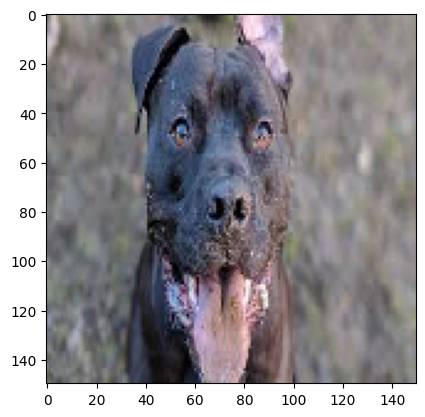

1/1 [==============================] - 0s 39ms/step
DOG


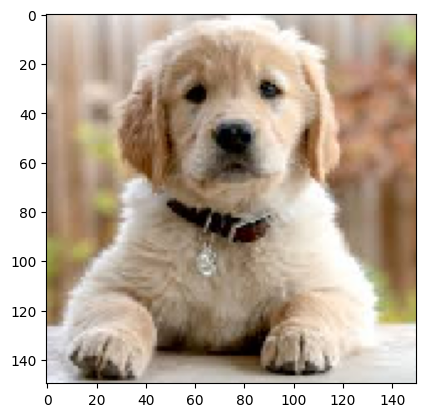

1/1 [==============================] - 0s 42ms/step
DOG


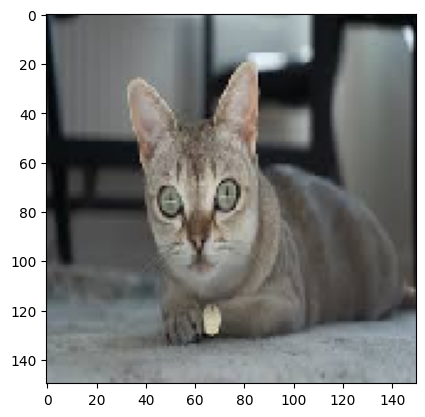

1/1 [==============================] - 0s 31ms/step
CAT


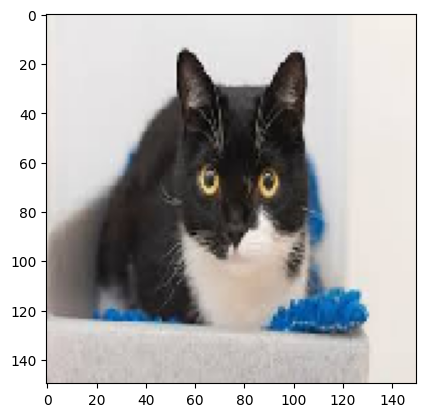

1/1 [==============================] - 0s 32ms/step
DOG


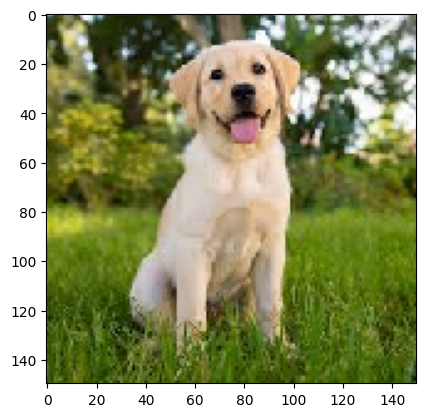

1/1 [==============================] - 0s 46ms/step
DOG


In [20]:
dir_path = 'C:/Users/svneh/OneDrive/Desktop/computerVisio/baseData/testing/'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '//' + i, target_size=(150, 150))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("CAT")
    else:
        print("DOG")